In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import r2_score,make_scorer
from sklearn.model_selection import cross_val_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls '/content/drive/MyDrive/Colab Notebooks/Project - DM/migraine.csv'

'/content/drive/MyDrive/Colab Notebooks/Project - DM/migraine.csv'


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project - DM/migraine.csv')
df.head(5)

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Visual_defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [5]:
df.describe()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Visual_defect,Ataxia,Conscience,Paresthesia,DPF
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,...,400.0000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000
mean,31.705000,1.610000,2.365000,0.972500,0.977500,2.47000,0.987500,0.322500,0.977500,0.980000,...,0.0025,0.125000,0.060000,0.015000,0.005000,0.015000,0.0,0.017500,0.007500,0.410000
std,12.139043,0.770964,1.675947,0.268186,0.277825,0.76849,0.111242,0.468019,0.148489,0.140175,...,0.0500,0.331133,0.237784,0.121705,0.070622,0.121705,0.0,0.131289,0.086385,0.492449
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,22.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,28.000000,1.000000,2.000000,1.000000,1.000000,3.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40.000000,2.000000,4.000000,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,77.000000,3.000000,8.000000,2.000000,2.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [6]:
df.dtypes

Age               int64
Duration          int64
Frequency         int64
Location          int64
Character         int64
Intensity         int64
Nausea            int64
Vomit             int64
Phonophobia       int64
Photophobia       int64
Visual            int64
Sensory           int64
Dysphasia         int64
Dysarthria        int64
Vertigo           int64
Tinnitus          int64
Hypoacusis        int64
Diplopia          int64
Visual_defect     int64
Ataxia            int64
Conscience        int64
Paresthesia       int64
DPF               int64
Type             object
dtype: object

In [7]:
df.columns

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Visual_defect', 'Ataxia', 'Conscience', 'Paresthesia',
       'DPF', 'Type'],
      dtype='object')

In [8]:
df.Type.unique()

array(['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine'], dtype=object)

In [9]:
df.Type.value_counts()

Typical aura with migraine       247
Migraine without aura             60
Familial hemiplegic migraine      24
Typical aura without migraine     20
Basilar-type aura                 18
Other                             17
Sporadic hemiplegic migraine      14
Name: Type, dtype: int64

In [10]:
df.drop_duplicates(keep = 'first', inplace = True)
df

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Visual_defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,1,0,0,1,0,0,0,0,1,Basilar-type aura
396,20,3,2,1,1,3,1,0,1,1,...,0,1,1,0,0,0,0,0,1,Basilar-type aura
397,28,3,2,1,1,3,1,0,1,1,...,1,0,0,0,1,0,0,0,1,Basilar-type aura
398,20,3,1,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,1,1,Basilar-type aura


In [11]:
df.isnull().sum()

Age              0
Duration         0
Frequency        0
Location         0
Character        0
Intensity        0
Nausea           0
Vomit            0
Phonophobia      0
Photophobia      0
Visual           0
Sensory          0
Dysphasia        0
Dysarthria       0
Vertigo          0
Tinnitus         0
Hypoacusis       0
Diplopia         0
Visual_defect    0
Ataxia           0
Conscience       0
Paresthesia      0
DPF              0
Type             0
dtype: int64

In [12]:
# Encode the Type of migraine into number
df.Type = df.Type.astype('category')
df.Type = df.Type.cat.codes
df.Type

0      5
1      5
2      5
3      5
4      5
      ..
395    0
396    0
397    0
398    0
399    0
Name: Type, Length: 394, dtype: int8

<AxesSubplot:>

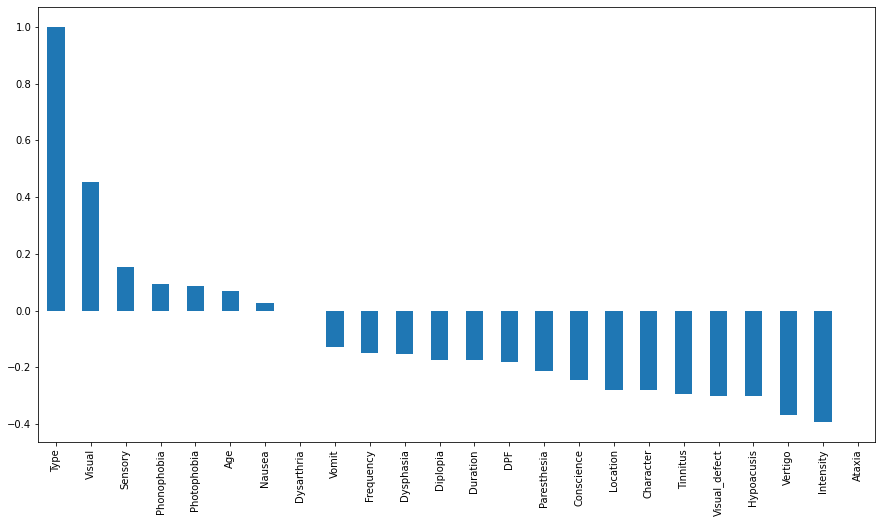

In [13]:
plt.figure(figsize=(15,8))
df.corr()['Type'].sort_values(ascending = False).plot(kind='bar')

In [14]:
# Since there is no data for Ataxia
df.drop('Ataxia', axis = 1, inplace = True)

In [15]:
## Feature Importance
X = df[df.columns.difference(["Type"])]
y = df['Type']

In [16]:
## Univariate analysis
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
featureScores['Score']=featureScores['Score'].round(0)
print(featureScores.nlargest(10,'Score'))  #print 10 best features

          Feature  Score
0             Age  178.0
18        Vertigo  140.0
19         Visual  137.0
9      Hypoacusis  125.0
20  Visual_defect  125.0
7       Dysphasia  107.0
8       Frequency  107.0
17       Tinnitus   89.0
13    Paresthesia   63.0
10      Intensity   60.0


<AxesSubplot:xlabel='Feature', ylabel='Score'>

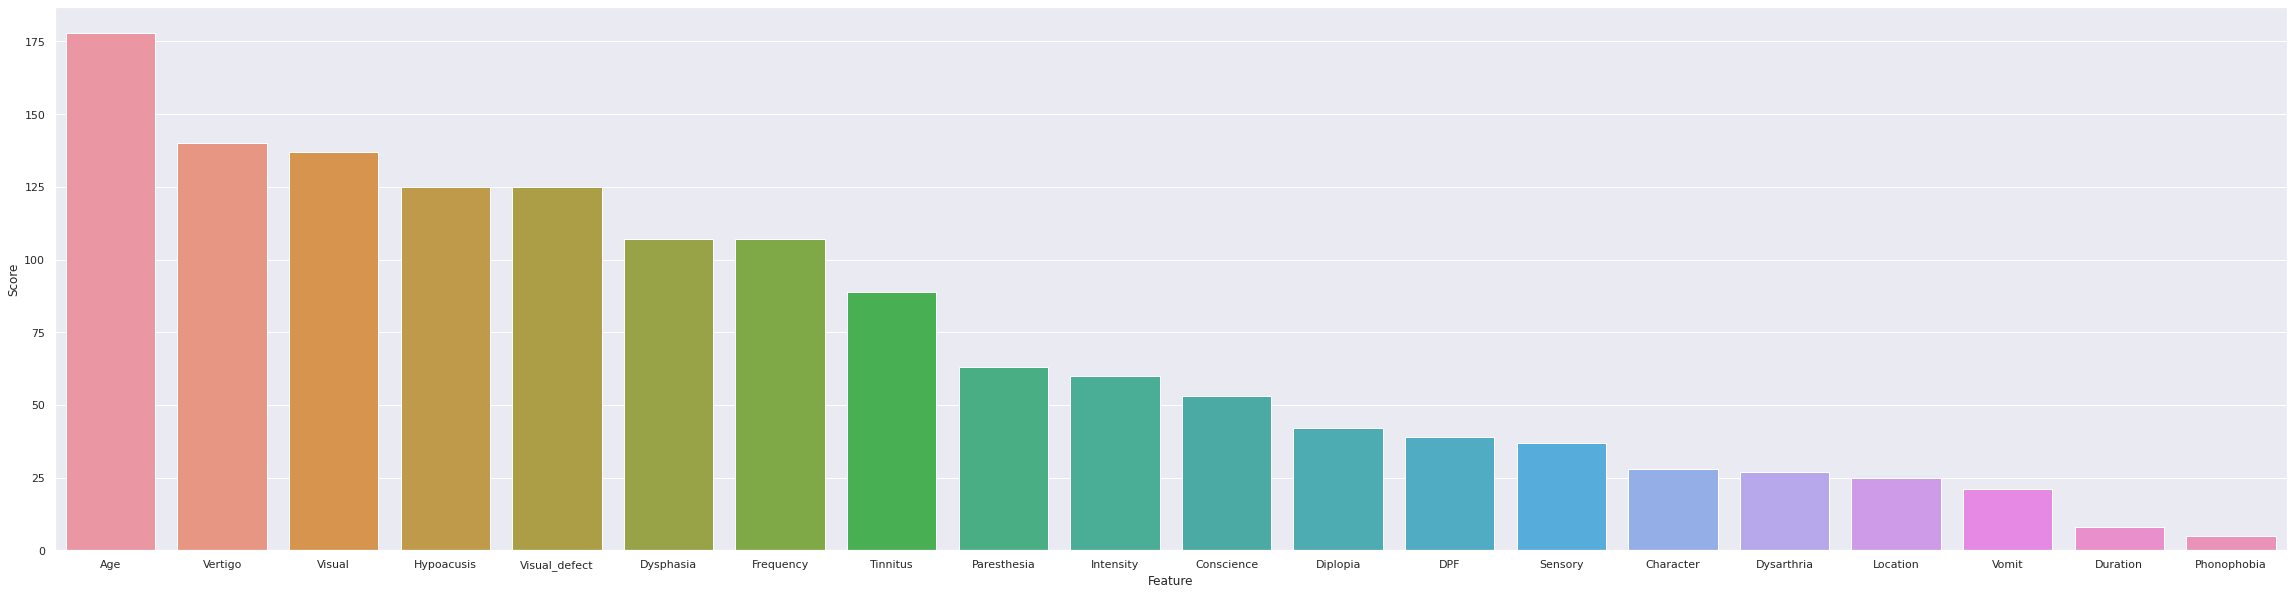

In [17]:
sns.set(rc = {'figure.figsize':(40,10)})
sns.barplot(x=featureScores.nlargest(20,'Score').Feature, y=featureScores.nlargest(20,'Score').Score)

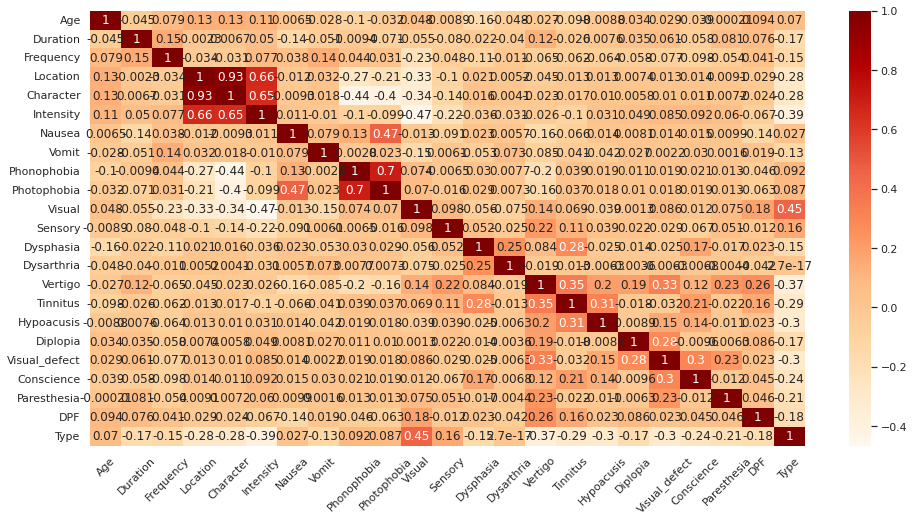

In [18]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True,cmap="OrRd")
plt.xticks(rotation=45);

[0.07358245 0.02562927 0.00246845 0.05127999 0.00048988 0.01804958
 0.         0.02238994 0.03589616 0.01517598 0.12198979 0.02322874
 0.00288089 0.00245442 0.00654086 0.00534736 0.06557339 0.06668281
 0.15234963 0.2679909  0.02730503 0.01269449]


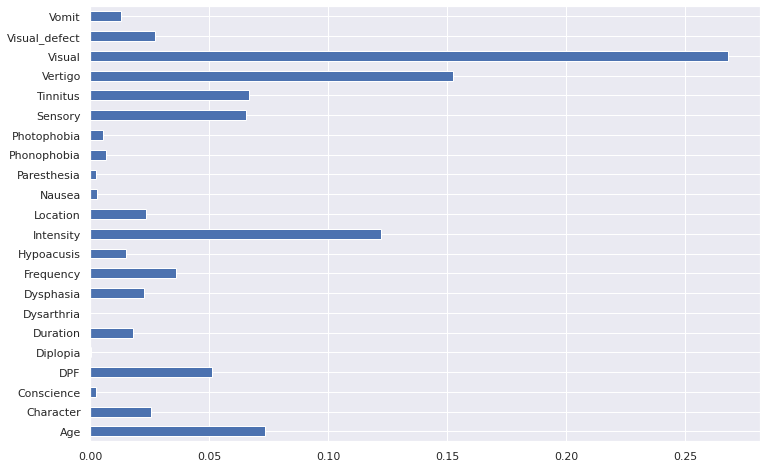

In [19]:


model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

In [20]:
# Since features like Diplopia, conscience, dysarthria, Nausea, Paresthesia, Photophobia, Phonophobia are very low importance faetures
# we can omit those from model consideration
df.drop('Nausea', axis = 1, inplace = True)
df.drop('Photophobia', axis = 1, inplace = True)
df.drop('Phonophobia', axis = 1, inplace = True)
df.drop('Paresthesia', axis = 1, inplace = True)
df.drop('Dysarthria', axis = 1, inplace = True)
df.drop('Conscience', axis = 1, inplace = True)
df.drop('Diplopia', axis = 1, inplace = True)

In [21]:
df.to_csv('cleaned_data.csv')